# Filters 
- Filtreleme, bir görüntüyü değiştirmek veya geliştirmek için kullanılan bir tekniktir.
- Özünde görüntülere uygulanana matematiksel bir işlevdir.
- Kenar algılama, smooth, sharpen, blur gibi işlemleri yapar.
### Filtreleme bir neihborhood üzerinde çalışır.
- Belirli görüntü işleme işlemleri, bir görüntünün bölümler halinde işlenmesini içerir. Tüm görüntüyü bir kerede işlemek yerine bloklar veya komşular olarak işleme alır 
<p align="center">
  <img src="neighborhood.png" />
</p>


In [5]:
import matplotlib.pyplot as plt
# subplot fonksiyonu
def plot_comparsion(original, filtered, original_title='Original', filtered_title='Filtered'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title(original_title)
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(filtered_title)
  ax2.axis('off')
  plt.tight_layout()

# Resmi oku
bulut = plt.imread('bulut.jpeg')

## Edge Detection
- Kenar algılama parlaklıktaki süreksizlikleri algılayarak çalışır.

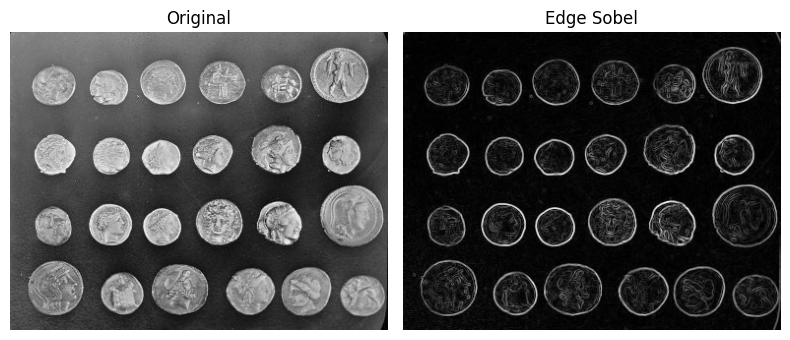

In [2]:
# Ortak bir kenar algılama algoritması Sobel kenar algılama algoritmasıdır.
from skimage.filters import sobel

# coins image 
from skimage import data
coins = data.coins()
# Edge detection filter 
# Bu filtre 2 boyutlu (gray scale) görüntülerde kenar algılama işlemi yapar.
edge_sobel = sobel(coins)

plot_comparsion(coins, edge_sobel, 'Original', 'Edge Sobel')

## Gaussian Smoothing
- Görüntüyü bulanıklaştırmak ve parazitleri azaltmak için kullanılır.
- Kenarları bulanıklaştırır ve kontrastı azaltır

/tmp/ipykernel_46327/2924168169.py:6: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  gaussian_image = gaussian(bulut, multichannel=True, sigma=5)


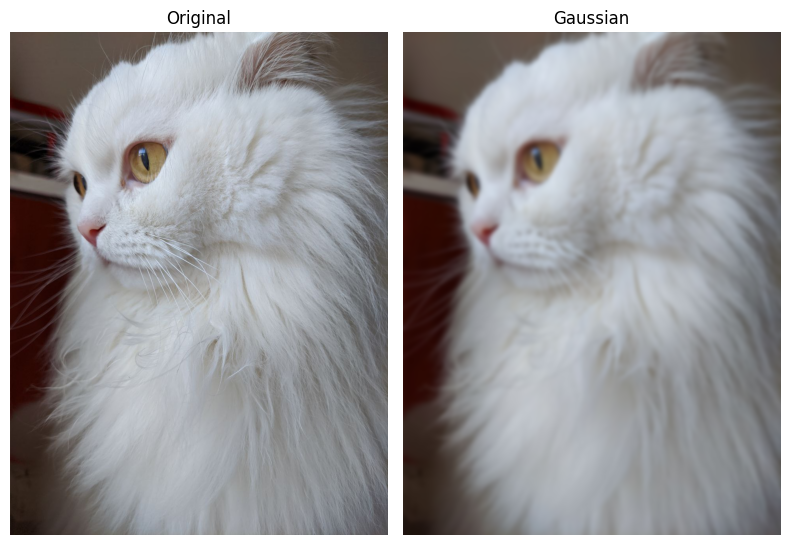

In [7]:
# import gaussian filter
from skimage.filters import gaussian 

# gaussian filter - sigma değeri arttıkça görüntü bulanıklaşır
# multichannel=True, renkli görüntüler için kullanılır.
gaussian_image = gaussian(bulut, multichannel=True, sigma=5)

plot_comparsion(bulut, gaussian_image, 'Original', 'Gaussian')

## Kontrast arttırma
- Röntgen gibi kontrastı düşük görüntülerin kontrastını arttırarak ayrıntıların fark edilmesini kolaylaştırır.
- Bir görüntünün kontrastı, dinamik aralığının ölçüsü veya histogramının "yayılımı" olarak görülebilir.
- Görüntünün kontrastı histogramında görüntüdeki maksimum ve minimum piksel yoğunluğu arasındaki farktır.
### Kontrast arttırma teknikleri 
- Contrasy stretching
  - Histogramı görüntünün tüm yoğunluk değerleri aralığnını dolduracak şekilde uzatır
- Histogram Equalization :En sık görülen yoğunluk değerlerini yayar.
    1. Standart 
    2. Adaptive 
    3. Contrast Limited Adaptive Histogram Equalization(CLAHE)

/home/hue/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


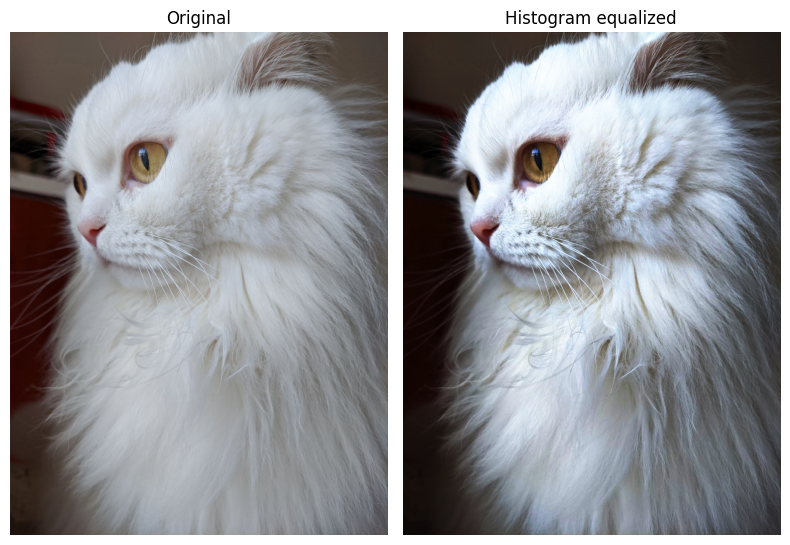

In [8]:
# Pozlama modülünü içe aktaralım 
from skimage import exposure

# Standart histogram eşitleme 
image_eq = exposure.equalize_hist(bulut)
plot_comparsion(bulut, image_eq,  'Original', 'Histogram equalized') 

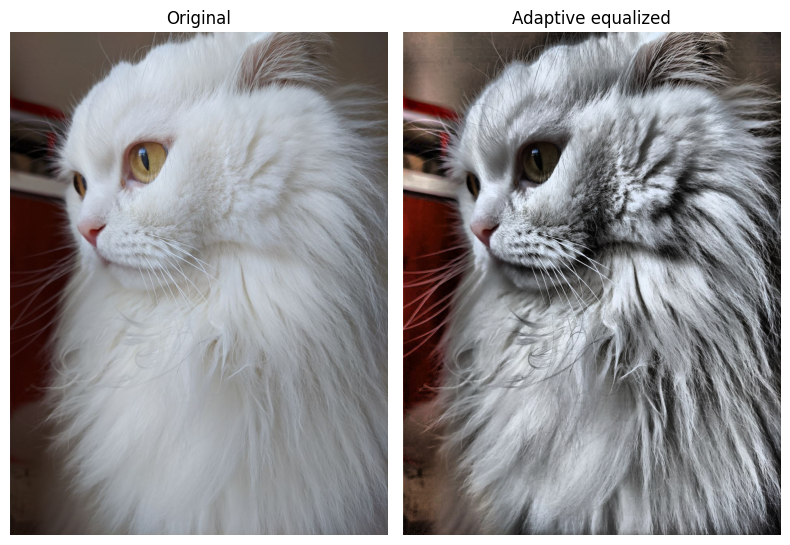

In [10]:
# CLACHE(Yerel Korelasyonlu  Normalleştirme/Genelleştirme) contrast equalization 
# Her bir blok için ayrı ayrı kontrast dönüştürme işlevi kullanır.
# Sınırlayıcı 0-1 arasında deper alır daha yüsek değerler daha fazla kontrastlı görüntüler için kullanılır.
image_adapteq = exposure.equalize_adapthist(bulut, clip_limit=0.02) 
plot_comparsion(bulut, image_adapteq, 'Original', 'Adaptive equalized')